In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [2]:
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.callbacks import History

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

* **input_dim**: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
* **output_dim**: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
* **input_length**: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

# Zad. 
Podążamy za stroną: 

https://keras.io/examples/pretrained_word_embeddings/

mamy jakiś zbiór tekstów:

In [3]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='train',categories=['sci.crypt', 'sci.electronics'])

In [4]:
# newsgroups_train.data[0]
print(newsgroups.data[0])

From: tedwards@eng.umd.edu (Thomas Grant Edwards)
Subject: Re: Once tapped, your code is no good any more.
Organization: Project GLUE, University of Maryland, College Park
Lines: 25
Distribution: na
NNTP-Posting-Host: pipa.src.umd.edu

In article <1r1r3nINNebn@dns1.NMSU.Edu> amolitor@nmsu.edu (Andrew Molitor) writes:
>In article <C5so84.Hxv@demon.co.uk> Graham Toal <gtoal@gtoal.com> writes:
>>Actually, I am *completely* baffled by why Dorothy Denning has chosen
>>to throw away her academic respectability like this.

>	Actually, I've been following her remarks for some time, with
>interest. I'm also a member of academia, and her remarks have nothing
>but elevate her respectability in my eyes. It remains to be seen whether
>you are the radical fringe, or I.

>	It is generally an error to assume that your beliefs are held by
>the majority, or even a sizable minority. Especially when you're seeing
>tens, nay dozens, of people on usenet agreeing with you.

The people on usenet are clearly a

In [5]:
X = newsgroups.data
y = newsgroups.target

len(X)

1186

In [6]:
from tensorflow.python.keras.utils import np_utils
y = np_utils.to_categorical(y)
y[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [7]:
import nltk
import string
import re
import pandas as pd

In [8]:
def extract_content(mail):    
    # wyciagniecie tresci maila   
    return mail[mail.find("\n\n"):]

def extract_subject(mail):
    return re.findall(r'Subject:(.+)',mail)[0]


def stem_helper(word,stemmer):
    try:
        y = stemmer.stem(word)
    except:
        y = word
    return y



def clean_text(x, stemmer = nltk.PorterStemmer()):   
    """
    x - jeden mail
    """    
 
    #tokenizacja - rozbicie na liste tokenow
    x_t = nltk.word_tokenize(x)    
    # usuwanie znakow interpunkcyjnych
    translator = str.maketrans('', '', string.punctuation)
    x_t = [word.translate(translator) for word in x_t]    
    # zamina liter male
    x_t = [word.lower() for word in x_t]    
    # usuwanie zbednych tokenow
    x_t = [w for w in x_t if w not in nltk.corpus.stopwords.words("english")+["nt"]]    
    # stemming
    x_t = [stem_helper(word,stemmer) for word in x_t]    
    # sklejenie do napisu
    x_new = ' '.join(x_t)    
    return x_new


X_c = [clean_text(extract_content(x)) for x in X]
X_s = [clean_text(extract_subject(x)) for x in X]

X = pd.DataFrame({"subject":X_s, "content":X_c})

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c,y,test_size=400)
#bierzemy tylko tresc - bez tytulu
print(y_test.shape)

(400, 2)


In [10]:
X_train[0]

'sound like pictur tube lost vacuum  would caus filament ignit could actual turn tube vacuum pressur vessel  follow explos neck assembl  mostli like crack begin  blow  whole sequenc event  circuit may continu function  account lose sound '

* Do warstwy **Embedding layer** wchodzi sekwencja intów.

* my wykorzystamy reprezenatację Bag of Words

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1

# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train)
print(encoded_docs)

[[265, 11, 1588, 702, 1194, 2674, 3, 544, 5094, 5095, 17, 115, 247, 702, 2674, 1516, 7788, 214, 2236, 7789, 531, 1195, 11, 782, 545, 3433, 417, 1147, 1303, 191, 23, 664, 241, 438, 1678, 265], [14, 7790, 4119, 3434, 4119, 8, 165, 11, 480, 2675, 2051, 19, 12, 2051, 19, 16, 2237, 418, 261, 3001, 3, 345, 304, 351, 703, 49, 35, 4, 130, 229, 409, 3, 80, 155, 187, 3, 636, 2238, 3001, 1238, 1148, 30, 44, 682, 2676, 12, 7791, 439, 3435, 5096, 266, 26, 42, 636, 7792, 58, 68, 351, 563, 52, 901, 665, 155, 880, 20, 1303, 53, 7793, 27, 42, 901, 381, 172, 203, 61, 563, 42, 996, 196, 7794, 3436, 392, 25, 827, 131, 7795, 603, 731, 578, 901, 4120, 1517], [14, 4121, 1679, 650, 997, 8, 15, 373, 4122, 481, 902, 6, 88, 510, 2239, 2407, 828, 849, 449, 89, 29, 3437, 44, 319, 29, 850, 338, 1366, 208, 3002, 1798, 1, 683, 32, 1518, 1149, 96, 118, 257, 15, 181, 352, 393, 185, 965, 66, 229, 783, 1150, 41, 427, 151, 2240, 1106, 35, 101, 89, 242, 881, 242, 319, 828, 849, 903, 4123, 151, 15, 59, 15, 2408, 2677, 3438,

Sekwencje mają różne długości, a Keras wymaga aby wejścia były równej długość.

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad documents to a max length of 4 words
max_length = 100
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[  265    11  1588 ...     0     0     0]
 [   14  7790  4119 ...     0     0     0]
 [ 1680   324    15 ...   704  2678  7800]
 ...
 [  727     4 13946 ... 13955  5093  2394]
 [ 2213  2361 13957 ...   519  4118  2213]
 [  512   143 13974 ...     0     0     0]]


* Embeding ma zakres 100 i długość wejściową 20. Zmniejszmy embending do wymiaru 20.
* Model jest prostym klasyfikatorem binarnym. 
* Co ważne, wynik z warstwy Embeding będzie wynosił 4 wektory o 8 wymiarach każdy, po jednym dla każdego słowa. 
* Spłaszczamy to do jednego 32-elementowego wektora, aby przejść do warstwy wyjściowej Dense.

In [13]:
history_1 = History()
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           698950    
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10002     
Total params: 708,952
Trainable params: 708,952
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
model.fit(padded_docs, y_train, epochs=100, validation_split=0.1, callbacks=[history_1])

Epoch 1/100
23/23 [==============================] - 1s 26ms/step - loss: 0.6792 - accuracy: 0.6011 - val_loss: 0.6540 - val_accuracy: 0.7595
Epoch 2/100
23/23 [==============================] - 0s 20ms/step - loss: 0.5937 - accuracy: 0.8812 - val_loss: 0.6228 - val_accuracy: 0.7089
Epoch 3/100
23/23 [==============================] - 0s 22ms/step - loss: 0.4616 - accuracy: 0.9222 - val_loss: 0.5523 - val_accuracy: 0.7215
Epoch 4/100
23/23 [==============================] - 1s 24ms/step - loss: 0.2868 - accuracy: 0.9661 - val_loss: 0.4545 - val_accuracy: 0.8228
Epoch 5/100
23/23 [==============================] - 0s 20ms/step - loss: 0.1398 - accuracy: 0.9830 - val_loss: 0.3606 - val_accuracy: 0.8861
Epoch 6/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0650 - accuracy: 0.9943 - val_loss: 0.2824 - val_accuracy: 0.9114
Epoch 7/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0345 - accuracy: 0.9972 - val_loss: 0.2463 - val_accuracy: 0.9620
Epoch 

23/23 [==============================] - 0s 18ms/step - loss: 2.4538e-04 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9873
Epoch 58/100
23/23 [==============================] - 0s 18ms/step - loss: 2.3618e-04 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 0.9873
Epoch 59/100
23/23 [==============================] - 0s 18ms/step - loss: 2.2724e-04 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9873
Epoch 60/100
23/23 [==============================] - 0s 17ms/step - loss: 2.1953e-04 - accuracy: 1.0000 - val_loss: 0.1028 - val_accuracy: 0.9873
Epoch 61/100
23/23 [==============================] - 0s 17ms/step - loss: 2.1184e-04 - accuracy: 1.0000 - val_loss: 0.1025 - val_accuracy: 0.9873
Epoch 62/100
23/23 [==============================] - 0s 17ms/step - loss: 2.0485e-04 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9873
Epoch 63/100
23/23 [==============================] - 0s 17ms/step - loss: 1.9784e-04 - accuracy: 1.0000 - val_loss: 0.1017 - val_a

In [15]:
# evaluate the model
padded_docs_test = pad_sequences( t.texts_to_sequences(X_test), maxlen=max_length, padding='post')
loss, accuracy = model.evaluate(padded_docs_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy))

Accuracy: 0.962500


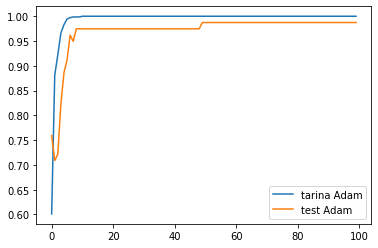

In [16]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Pretrain embedding

https://keras.io/examples/pretrained_word_embeddings/

* GloVe embedding data can be found at: http://nlp.stanford.edu/data/glove.6B.zip (source page: http://nlp.stanford.edu/projects/glove/)

* After downloading and unzipping, you will see a few files, one of which is “glove.6B.50d.txt“, which contains a 100-dimensional version of the embedding.


Pojedyńczy plik można pobrać z tąd:
https://www.dropbox.com/sh/tjq47ybybgnrbel/AAAVbp0UkQTAbKWVMIi5mtHpa?dl=0

In [21]:
BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B.50d')

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
# file = open(filename, encoding="utf8")
with open(os.path.join(GLOVE_DIR, 'glove.6B.50d.txt'), encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs
        

print('Loaded %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Loaded 400000 word vectors.


In [22]:
embeddings_index["the"]

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

Keras provides a Tokenizer class that can be fit on the training data, can convert text to sequences consistently by calling the texts_to_sequences() method on the Tokenizer class, and provides access to the dictionary mapping of words to integers in a word_index attribute.

https://keras.io/preprocessing/text/#tokenizer

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1

# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train)
print(encoded_docs)

[[12, 7864, 2107, 2284, 2107, 7, 109, 697, 1262, 305, 91, 47, 285, 32, 3, 29, 91, 768, 210, 362, 540, 1376, 1818, 210, 649, 33, 354, 100, 7865, 9, 21, 1263, 50, 21, 242, 47, 1008, 21, 885, 1377, 27, 541, 5198, 142, 575, 91, 47, 285, 4128, 10, 196, 138, 249, 418, 42, 197, 342, 419, 11, 1313, 1153, 29, 102, 1444, 300, 2739, 2108, 29, 91, 1947, 62, 201, 274, 142, 3475, 62, 837, 630, 154, 469, 320, 7866, 393, 706, 36, 2285, 3065, 36, 119, 2286, 73, 2739, 677, 132, 21, 261, 452, 22, 50, 2740, 1264, 300, 469, 44, 38, 1265, 3066, 5199, 62, 13, 191, 3476, 1513, 594, 300, 4129, 7867, 47, 285, 355, 220, 35, 3475, 7868, 7869, 274, 394, 1606, 212, 1514, 82, 82, 82, 13, 100, 62, 1, 1209, 7870, 95, 2741, 376, 120, 7871, 1210, 301, 1112, 2287, 28, 1607, 2742, 769, 2743, 175, 1607, 2744, 1378, 1608, 1009, 1379, 2745, 84, 1609, 2495, 2746, 275, 2747, 1266, 917, 2748, 2749, 2750, 1609, 1948, 51, 202, 247, 433, 233, 707, 770, 173], [12, 5200, 3477, 5201, 3477, 5202, 2109, 101, 7, 206, 838, 4130, 1515, 24

Sekwencje mają różne długości, a Keras wymaga aby wejścia były równej długość.

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad documents to a max length of 4 words
max_length = 100
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 393  706   36 ...  707  770  173]
 [  12 5200 3477 ... 5203    0    0]
 [ 792   51  421 ...    0    0    0]
 ...
 [ 268  644  659 ...    0    0    0]
 [1858  141   27 ... 4781 1918 1986]
 [2894   69 3061 ...    0    0    0]]


Next, we need to create a matrix of one embedding for each word in the training dataset. We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded GloVe embedding.

The result is a matrix of weights only for words we will see during training.

In [26]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embedding_matrix.shape        

(14242, 50)

In [27]:
embedding_matrix[1]

array([ 0.36403999, -0.16619   ,  0.28584   , -0.17042001, -0.42253   ,
        0.43921   , -0.2348    , -0.89033997,  0.063375  ,  0.37834999,
        0.41150999,  0.72864997,  0.72612   , -0.081949  , -0.18455   ,
        0.58287001, -0.055214  ,  0.19533999, -0.022018  , -1.20550001,
        0.47209001, -0.53654999,  0.17969   ,  0.056589  , -0.19033   ,
       -1.74269998, -0.19718   , -0.44248   ,  0.85522997, -0.51624   ,
        3.74819994, -0.094815  , -1.11039996, -0.73457003,  0.36396   ,
        0.62193   ,  0.35602999,  0.14707001, -0.42021   ,  0.16993999,
        0.74747002,  0.14756   ,  0.41393   ,  0.80216998,  0.58067   ,
        0.10242   ,  0.1147    ,  0.40129   , -0.086234  ,  0.045505  ])

In [28]:
embedding_matrix[20]

array([-0.72772002,  0.52272999,  1.07379997,  1.00399995, -0.37608001,
        0.61381   ,  0.56190002,  0.048985  , -0.053258  , -1.26769996,
       -0.56968999, -0.21309   , -0.53059   ,  1.09109998, -0.15460999,
        0.2534    , -0.21827   ,  0.020068  ,  0.01696   , -0.93752998,
        1.58099997, -0.48179001,  0.38      ,  0.20764001, -0.46605   ,
       -1.10739994,  0.16362999,  0.68462002,  1.08010006, -1.08609998,
        2.0697    , -0.46079999,  0.40031999,  0.098434  , -1.09940004,
        1.08290005,  0.22257   ,  0.21325999, -0.02205   ,  0.34999001,
        1.11759996,  0.2401    ,  0.56312001,  0.72837001,  0.45421001,
       -0.94515002,  0.34588   , -0.68763   , -0.083942  , -0.57770997])

The key difference is that the embedding layer can be seeded with the GloVe word embedding weights. We chose the 50-dimensional version, therefore the Embedding layer must be defined with output_dim set to 50. Finally, we do not want to update the learned word weights in this model, therefore we will set the trainable attribute for the model to be False.

In [29]:
e = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=100, trainable=False)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History

history_2 = History()
model = Sequential()
e = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=100, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           712100    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10002     
Total params: 722,102
Trainable params: 10,002
Non-trainable params: 712,100
_________________________________________________________________
None


In [31]:
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
model.fit(padded_docs, y_train, epochs=100, validation_split=0.1, callbacks=[history_2])

Epoch 1/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6431 - accuracy: 0.6280 - val_loss: 0.6499 - val_accuracy: 0.6076
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.9024 - val_loss: 0.6532 - val_accuracy: 0.6456
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.9590 - val_loss: 0.6415 - val_accuracy: 0.6709
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9859 - val_loss: 0.6330 - val_accuracy: 0.6962
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9943 - val_loss: 0.6281 - val_accuracy: 0.6835
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9958 - val_loss: 0.6264 - val_accuracy: 0.6962
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9958 - val_loss: 0.6303 - val_accuracy: 0.6835
Epoch 8/100
2

Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.8271 - val_accuracy: 0.7342
Epoch 60/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.8305 - val_accuracy: 0.7342
Epoch 61/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8332 - val_accuracy: 0.7342
Epoch 62/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.8359 - val_accuracy: 0.7342
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.8383 - val_accuracy: 0.7342
Epoch 64/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8402 - val_accuracy: 0.7342
Epoch 65/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.8425 - val_accuracy: 0.7342
Epoch 

In [32]:
# evaluate the model
padded_docs_test = pad_sequences( t.texts_to_sequences(X_test), maxlen=max_length, padding='post')
loss, accuracy = model.evaluate(padded_docs_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy))

Accuracy: 0.795000


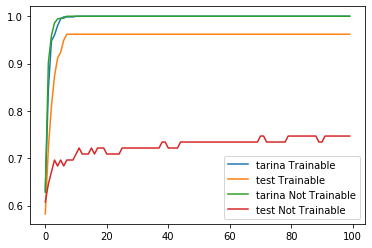

In [33]:
plt.plot(history_1.history['accuracy'], label = "tarina Trainable")
plt.plot(history_1.history['val_accuracy'], label = "test Trainable")

plt.plot(history_2.history['accuracy'], label = "tarina Not Trainable")
plt.plot(history_2.history['val_accuracy'], label = "test Not Trainable")


plt.legend()
plt.show()

In [34]:
y_train.shape

(786, 2)